In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

Mounted at /content/drive


In [13]:
data = pd.read_csv('/content/drive/MyDrive/bangladesh_student/Stress2.csv')
data.head()

,1. Age,3. University,4. Department,6. Current CGPA,7. Did you receive a waiver or scholarship at your university?,"1. In a semester, how often have you felt upset due to something that happened in your academic affairs?","2. In a semester, how often you felt as if you were unable to control important things in your academic affairs?","3. In a semester, how often you felt nervous and stressed because of academic pressure?","4. In a semester, how often you felt as if you could not cope with all the mandatory academic activities? (e.g, assignments, quiz, exams)","5. In a semester, how often you felt confident about your ability to handle your academic / university problems?",...,"10. In a semester, how often you felt as if academic difficulties are piling up so high that you could not overcome them?",Stress Level\n0-13: low stress\n14-26: moderate stress\n27-40: high preceived stress,2. Gender_Female,2. Gender_Male,2. Gender_Prefer not to say,5. Academic Year_First Year or Equivalent,5. Academic Year_Fourth Year or Equivalent,5. Academic Year_Other,5. Academic Year_Second Year or Equivalent,5. Academic Year_Third Year or Equivalent
0,1,8,2,1,0,2,2,3,2,2,...,2,1,True,False,False,False,True,False,False,False
1,1,8,2,4,0,2,2,2,2,2,...,2,1,False,True,False,True,False,False,False,False
2,1,8,2,2,0,3,2,2,3,3,...,1,1,False,True,False,True,False,False,False,False
3,1,8,2,3,0,2,2,2,2,2,...,2,1,False,True,False,True,False,False,False,False
4,1,8,2,3,0,2,2,2,2,2,...,2,1,False,True,False,True,False,False,False,False


In [14]:
# Drop the 'Abundance' column from the DataFrame to create the feature matrix X
X = data.drop('Stress Level\n0-13: low stress\n14-26: moderate stress\n27-40: high preceived stress', axis=1)

# Extract the 'Abundance' column as the target variable y
y = data['Stress Level\n0-13: low stress\n14-26: moderate stress\n27-40: high preceived stress']

# Print the feature matrix X and target variable y
print(X)
print(y)


      1. Age  3. University  4. Department  6. Current CGPA  \
0          1              8              2                1   
1          1              8              2                4   
2          1              8              2                2   
3          1              8              2                3   
4          1              8              2                3   
...      ...            ...            ...              ...   
1972       2              2              0                3   
1973       2              2             10                3   
1974       2              2              0                4   
1975       2              2             10                2   
1976       2              8              2                1   

      7. Did you receive a waiver or scholarship at your university?  \
0                                                     0                
1                                                     0                
2                          

In [15]:
from sklearn.model_selection import train_test_split
# Split the data into train, test, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [5]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

# Initialize the XGBoost classifier
xgb_classifier = XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='mlogloss')

# Train the model
xgb_classifier.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:56:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:56:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:56:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:56:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:56:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:56:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Cross-Validation Scores: [0.94444444 0.94191919 0.95443038 0.94683544 0.94683544]
Mean Cross-Validation Score: 0.9468929804372843


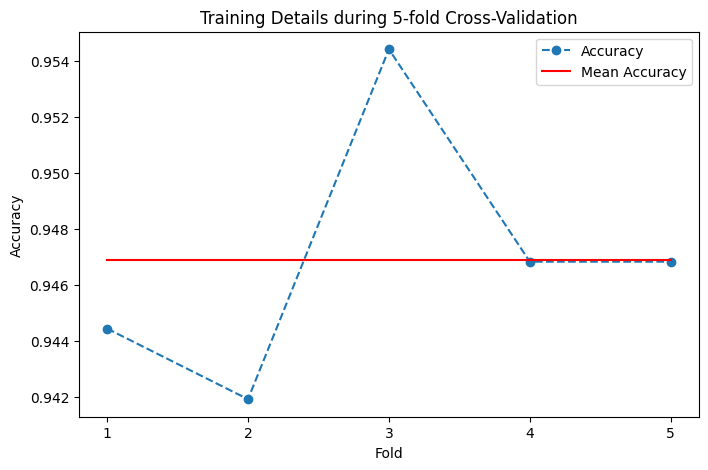

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve

# Model training with 5-fold cross-validation using XGBoost
xgb_classifier = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
cv_scores = cross_val_score(xgb_classifier, X, y, cv=5, scoring='accuracy')
cv_predictions = cross_val_predict(xgb_classifier, X, y, cv=5)

# Calculate mean cross-validation score
mean_cv_score = np.mean(cv_scores)

print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", mean_cv_score)

# Plot training details
plt.figure(figsize=(8, 5))
plt.plot(range(1, 6), cv_scores, marker='o', linestyle='--', label='Accuracy')
plt.plot(range(1, 6), [mean_cv_score] * 5, color='r', linestyle='-', label='Mean Accuracy')
plt.xticks(range(1, 6))
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Training Details during 5-fold Cross-Validation')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:56:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9545454545454546
Precision: 0.9552090245520902
Recall: 0.9545454545454546
F1-score: 0.9537147968882286
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.75      0.86        24
           1       0.96      0.98      0.97       268
           2       0.94      0.94      0.94       104

    accuracy                           0.95       396
   macro avg       0.97      0.89      0.92       396
weighted avg       0.96      0.95      0.95       396



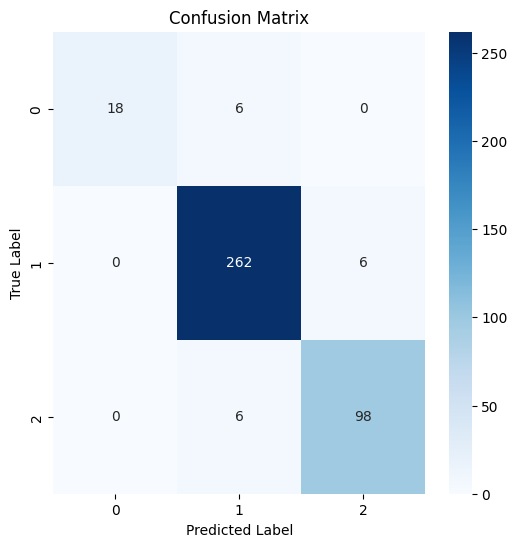

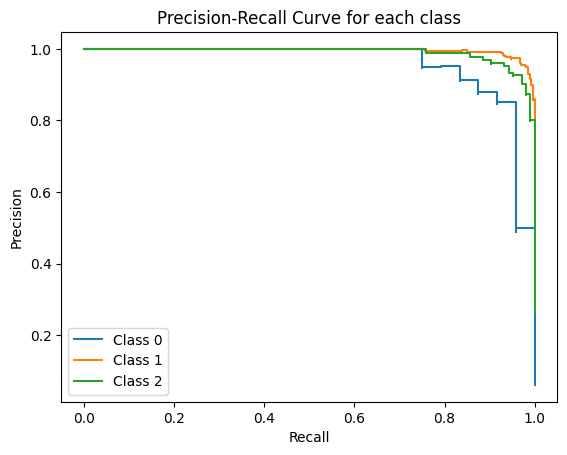

In [7]:
from xgboost import XGBClassifier
from sklearn.metrics import precision_recall_curve, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize and train (fit) the XGBClassifier model
xgb_classifier = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_classifier.fit(X_train, y_train)

# Model testing and evaluation
y_pred_probs = xgb_classifier.predict_proba(X_test)  # Calculate predicted probabilities

# Model predictions
y_pred = xgb_classifier.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Generate and plot classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Plot Confusion Matrix
confusion_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Calculate Precision-Recall Curve for each class (using one-vs-all strategy)
num_classes = len(set(y_test))
for class_index in range(num_classes):
    precision, recall, _ = precision_recall_curve(
        (y_test == class_index).astype(int),
        y_pred_probs[:, class_index]
    )
    plt.step(recall, precision, where='post', label=f'Class {class_index}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for each class')
plt.legend()
plt.show()


Epoch 1/500


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4945 - loss: 0.7010 - val_accuracy: 0.4938 - val_loss: 0.6942
Epoch 2/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5334 - loss: 0.6923 - val_accuracy: 0.5000 - val_loss: 0.6935
Epoch 3/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5441 - loss: 0.6873 - val_accuracy: 0.5000 - val_loss: 0.6924
Epoch 4/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6121 - loss: 0.6826 - val_accuracy: 0.5750 - val_loss: 0.6871
Epoch 5/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5987 - loss: 0.6798 - val_accuracy: 0.5312 - val_loss: 0.6924
Epoch 6/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5939 - loss: 0.6777 - val_accuracy: 0.5312 - val_loss: 0.6853
Epoch 7/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5712 - loss: 0.6743 - val_accuracy: 0.5875 - val_loss: 0.6853
Epoch 8/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6116 - loss: 0.6647 - val_accuracy: 0.5188 - val_loss: 0.

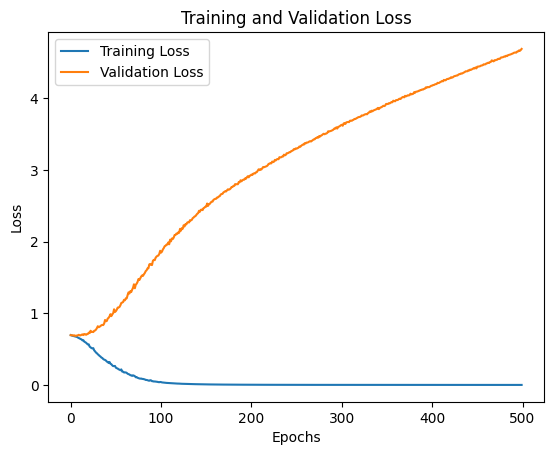

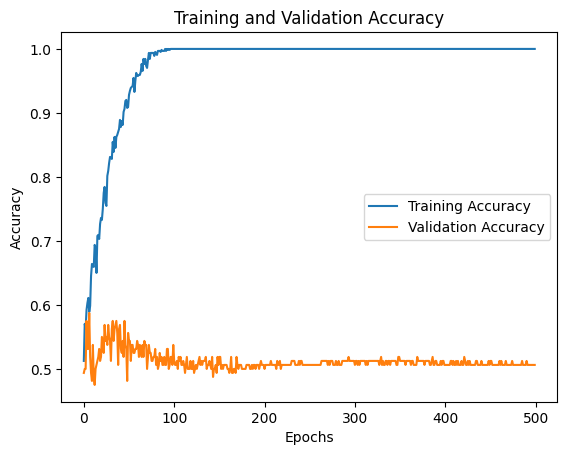

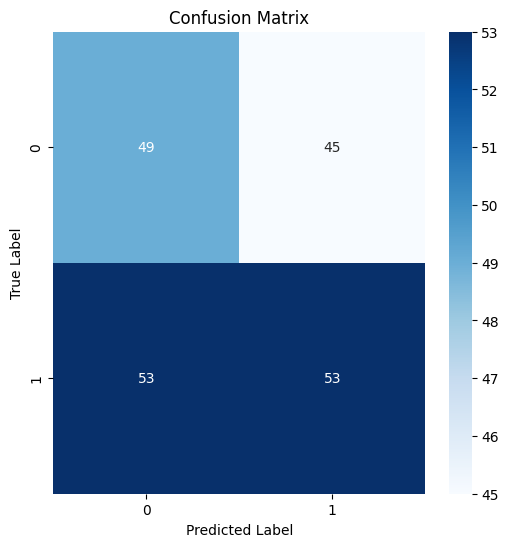

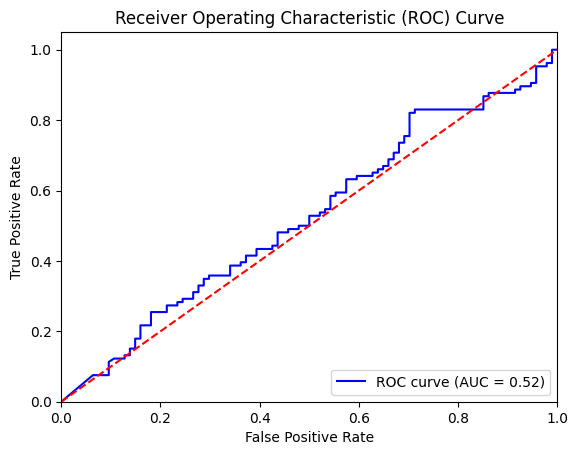

In [8]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report, precision_recall_curve, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming you have your data in a pandas DataFrame called 'df'
# Replace 'target_column' with your actual target column name
# X = df.drop('target_column', axis=1).values
# y = df['target_column'].values

# For demonstration purposes, let's create some example data
# Replace this with your actual data preparation
X, y = np.random.rand(1000, 20), np.random.randint(0, 2, 1000)

# Convert data to proper types
X = np.asarray(X, dtype=np.float32)
y = np.asarray(y, dtype=np.int32)

# Split the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define the ANN architecture
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=500, batch_size=32, validation_data=(X_val, y_val))

# Model testing and evaluation
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Generate and print classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plot Confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='b', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [9]:
!pip install deap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 3.0 MB/s eta 0:00:00


In [18]:
import numpy as np
from deap import base, creator, tools, algorithms

# Define the evaluation function for optimization
def evaluate_individual(individual):
    x, y = individual  # Extract values
    # Objective function: f(x, y) = x * sin(y) + y * cos(x)
    result = x * np.sin(y) + y * np.cos(x)
    return result,

# Create custom fitness and individual classes for maximization
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

# Register functions to generate individuals and the population
toolbox = base.Toolbox()
toolbox.register("attr_float", np.random.uniform, -10, 10)  # Float attributes in range [-10, 10]
toolbox.register("individual", tools.initCycle, creator.Individual,
                 (toolbox.attr_float, toolbox.attr_float), n=1)  # Individual with two attributes (x, y)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Register genetic algorithm operators
toolbox.register("evaluate", evaluate_individual)
toolbox.register("mate", tools.cxBlend, alpha=0.5)  # Blending crossover
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.2)  # Gaussian mutation
toolbox.register("select", tools.selTournament, tournsize=3)

# Create the population
population = toolbox.population(n=50)

# Genetic algorithm parameters
NGEN = 10
CXPB = 0.5  # Crossover probability
MUTPB = 0.2  # Mutation probability

# Run the genetic algorithm
for gen in range(NGEN):
    # Apply selection, crossover, and mutation
    offspring = toolbox.select(population, len(population))
    offspring = list(map(toolbox.clone, offspring))

    # Apply crossover and mutation
    for child1, child2 in zip(offspring[::2], offspring[1::2]):
        if np.random.rand() < CXPB:
            toolbox.mate(child1, child2)
            del child1.fitness.values
            del child2.fitness.values

    for mutant in offspring:
        if np.random.rand() < MUTPB:
            toolbox.mutate(mutant)
            del mutant.fitness.values

    # Evaluate individuals with invalid fitness
    invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
    fitnesses = map(toolbox.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit

    # Replace population with the offspring
    population[:] = offspring

# Find and display the best individual
best_individual = tools.selBest(population, k=1)[0]
print("Best individual:", best_individual)
print("Best fitness:", best_individual.fitness.values[0])


Best individual: [6.17793769129547, 14.250184920779986]
Best fitness: 20.309856742326343


/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


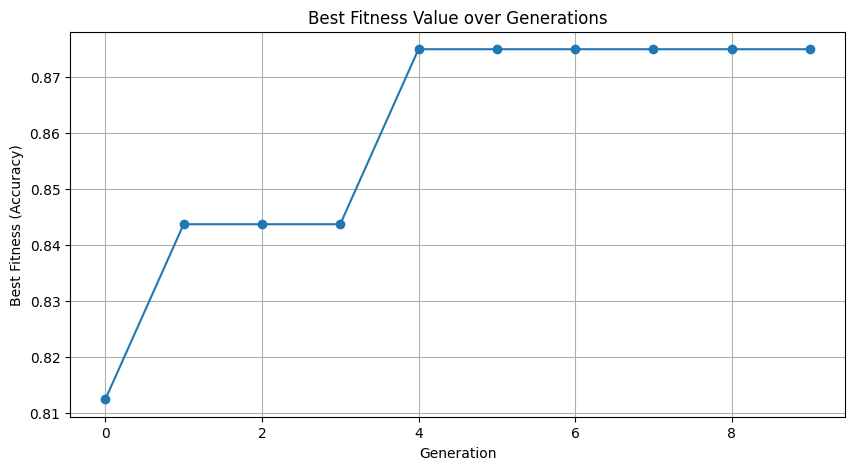

Selected Features: [0, 1, 2, 4, 5, 6, 9, 12, 13, 17, 18]
Test Accuracy with selected features: 0.775


In [11]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from deap import base, creator, tools, algorithms
import matplotlib.pyplot as plt

# Create a synthetic dataset
X, y = make_classification(n_samples=200, n_features=20, n_informative=10, n_redundant=5, random_state=42)

# Create the fitness and individual classes
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

# Define the genetic algorithm functions
toolbox = base.Toolbox()
toolbox.register("attr_bool", np.random.randint, 2)  # binary features
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=X.shape[1])
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Split the data into train, test, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define evaluation function
def evaluate_individual(individual):
    selected_features = [index for index, bit in enumerate(individual) if bit == 1]

    if len(selected_features) == 0:  # No features selected
        return 0,

    # Select features
    X_train_subset = X_train[:, selected_features]
    X_val_subset = X_val[:, selected_features]

    # Train logistic regression
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train_subset, y_train)

    # Predict and calculate accuracy
    y_pred = model.predict(X_val_subset)
    accuracy = accuracy_score(y_val, y_pred)

    return accuracy,

# Register genetic algorithm components
toolbox.register("evaluate", evaluate_individual)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

# Initialize population
population = toolbox.population(n=50)

# Genetic algorithm parameters
NGEN = 10
CXPB = 0.5
MUTPB = 0.2

# Store the best fitness values for plotting
best_fitness_values = []

# Apply the genetic algorithm
for gen in range(NGEN):
    offspring = algorithms.varAnd(population, toolbox, CXPB, MUTPB)
    fits = map(toolbox.evaluate, offspring)

    for fit, ind in zip(fits, offspring):
        ind.fitness.values = fit

    best_fitness = max(ind.fitness.values[0] for ind in offspring)
    best_fitness_values.append(best_fitness)

    population[:] = toolbox.select(offspring, k=len(population))

# Plot the best fitness values over generations
plt.figure(figsize=(10, 5))
plt.plot(range(NGEN), best_fitness_values, marker='o')
plt.title('Best Fitness Value over Generations')
plt.xlabel('Generation')
plt.ylabel('Best Fitness (Accuracy)')
plt.grid()
plt.show()

# Get the best individual
best_individual = tools.selBest(population, k=1)[0]
selected_features = [index for index, bit in enumerate(best_individual) if bit == 1]

print("Selected Features:", selected_features)

# Train final model with selected features
X_train_best = X_train[:, selected_features]
X_test_best = X_test[:, selected_features]

final_model = LogisticRegression(max_iter=1000)
final_model.fit(X_train_best, y_train)
y_test_pred = final_model.predict(X_test_best)

# Final evaluation
accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy with selected features:", accuracy)


/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.

Error with individual [0.0, 'False']: The 'C' parameter of LogisticRegression must be a float in the range (0.0, inf]. Got 0.0 instead.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Error with individual [0.0, 'False']: The 'C' parameter of LogisticRegression must be a float in the range (0.0, inf]. Got 0.0 instead.
Error with individual [0.0, 'False']: The 'C' parameter of LogisticRegression must be a float in the range (0.0, inf]. Got 0.0 instead.
Error with individual [0.0, 'False']: The 'C' parameter of LogisticRegression must be a float in the range (0.0, inf]. Got 0.0 instead.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Error with individual [0.0, 'False']: The 'C' parameter of LogisticRegression must be a float in the range (0.0, inf]. Got 0.0 instead.
Error with individual [0.0, 'newton-cg']: The 'C' parameter of LogisticRegression must be a float in the range (0.0, inf]. Got 0.0 instead.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Error with individual [0.0, 'lbfgs']: The 'C' parameter of LogisticRegression must be a float in the range (0.0, inf]. Got 0.0 instead.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Error with individual [0.30000000000000004, 'False']: The 'solver' parameter of LogisticRegression must be a str among {'newton-cg', 'lbfgs', 'newton-cholesky', 'saga', 'liblinear', 'sag'}. Got 'False' instead.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Error with individual [0.0, 'False']: The 'C' parameter of LogisticRegression must be a float in the range (0.0, inf]. Got 0.0 instead.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Error with individual [0.0, 'False']: The 'C' parameter of LogisticRegression must be a float in the range (0.0, inf]. Got 0.0 instead.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Error with individual [0.0, 'newton-cg']: The 'C' parameter of LogisticRegression must be a float in the range (0.0, inf]. Got 0.0 instead.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Error with individual [1.0, 'False']: The 'solver' parameter of LogisticRegression must be a str among {'newton-cg', 'lbfgs', 'newton-cholesky', 'saga', 'liblinear', 'sag'}. Got 'False' instead.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Error with individual [0.0, 'lbfgs']: The 'C' parameter of LogisticRegression must be a float in the range (0.0, inf]. Got 0.0 instead.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Error with individual [0.0, 'False']: The 'C' parameter of LogisticRegression must be a float in the range (0.0, inf]. Got 0.0 instead.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Error with individual [0.0, 'False']: The 'C' parameter of LogisticRegression must be a float in the range (0.0, inf]. Got 0.0 instead.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Error with individual [9.6, 'False']: The 'solver' parameter of LogisticRegression must be a str among {'newton-cg', 'lbfgs', 'newton-cholesky', 'saga', 'liblinear', 'sag'}. Got 'False' instead.
Error with individual [0.0, 'sag']: The 'C' parameter of LogisticRegression must be a float in the range (0.0, inf]. Got 0.0 instead.
Error with individual [0.1, 'False']: The 'solver' parameter of LogisticRegression must be a str among {'newton-cg', 'lbfgs', 'newton-cholesky', 'saga', 'liblinear', 'sag'}. Got 'False' instead.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Error with individual [4.3999999999999995, 'False']: The 'solver' parameter of LogisticRegression must be a str among {'newton-cg', 'lbfgs', 'newton-cholesky', 'saga', 'liblinear', 'sag'}. Got 'False' instead.
Error with individual [0.0, 'lbfgs']: The 'C' parameter of LogisticRegression must be a float in the range (0.0, inf]. Got 0.0 instead.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Error with individual [0.0, 'sag']: The 'C' parameter of LogisticRegression must be a float in the range (0.0, inf]. Got 0.0 instead.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Error with individual [0.0, 'liblinear']: The 'C' parameter of LogisticRegression must be a float in the range (0.0, inf]. Got 0.0 instead.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Error with individual [0.0, 'lbfgs']: The 'C' parameter of LogisticRegression must be a float in the range (0.0, inf]. Got 0.0 instead.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Error with individual [0.0, 'False']: The 'C' parameter of LogisticRegression must be a float in the range (0.0, inf]. Got 0.0 instead.
Error with individual [8.3, 'False']: The 'solver' parameter of LogisticRegression must be a str among {'newton-cg', 'lbfgs', 'newton-cholesky', 'saga', 'liblinear', 'sag'}. Got 'False' instead.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Error with individual [0.0, 'False']: The 'C' parameter of LogisticRegression must be a float in the range (0.0, inf]. Got 0.0 instead.
Error with individual [0.0, 'newton-cg']: The 'C' parameter of LogisticRegression must be a float in the range (0.0, inf]. Got 0.0 instead.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Error with individual [0.0, 'sag']: The 'C' parameter of LogisticRegression must be a float in the range (0.0, inf]. Got 0.0 instead.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Error with individual [0.0, 'False']: The 'C' parameter of LogisticRegression must be a float in the range (0.0, inf]. Got 0.0 instead.
Error with individual [6.2, 'False']: The 'solver' parameter of LogisticRegression must be a str among {'newton-cg', 'lbfgs', 'newton-cholesky', 'saga', 'liblinear', 'sag'}. Got 'False' instead.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Error with individual [8.5, 'False']: The 'solver' parameter of LogisticRegression must be a str among {'newton-cg', 'lbfgs', 'newton-cholesky', 'saga', 'liblinear', 'sag'}. Got 'False' instead.
Error with individual [0.0, 'False']: The 'C' parameter of LogisticRegression must be a float in the range (0.0, inf]. Got 0.0 instead.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Error with individual [0.0, 'False']: The 'C' parameter of LogisticRegression must be a float in the range (0.0, inf]. Got 0.0 instead.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Error with individual [2.7, 'False']: The 'solver' parameter of LogisticRegression must be a str among {'newton-cg', 'lbfgs', 'newton-cholesky', 'saga', 'liblinear', 'sag'}. Got 'False' instead.
Error with individual [0.0, 'False']: The 'C' parameter of LogisticRegression must be a float in the range (0.0, inf]. Got 0.0 instead.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Error with individual [0.0, 'False']: The 'C' parameter of LogisticRegression must be a float in the range (0.0, inf]. Got 0.0 instead.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Error with individual [0.6, 'False']: The 'solver' parameter of LogisticRegression must be a str among {'newton-cg', 'lbfgs', 'newton-cholesky', 'saga', 'liblinear', 'sag'}. Got 'False' instead.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Error with individual [9.2, 'False']: The 'solver' parameter of LogisticRegression must be a str among {'newton-cg', 'lbfgs', 'newton-cholesky', 'saga', 'liblinear', 'sag'}. Got 'False' instead.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Error with individual [0.0, 'False']: The 'C' parameter of LogisticRegression must be a float in the range (0.0, inf]. Got 0.0 instead.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Error with individual [1.8000000000000003, 'False']: The 'solver' parameter of LogisticRegression must be a str among {'newton-cg', 'lbfgs', 'newton-cholesky', 'saga', 'liblinear', 'sag'}. Got 'False' instead.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Error with individual [6.4, 'False']: The 'solver' parameter of LogisticRegression must be a str among {'newton-cg', 'lbfgs', 'newton-cholesky', 'saga', 'liblinear', 'sag'}. Got 'False' instead.
Error with individual [1.5000000000000002, 'False']: The 'solver' parameter of LogisticRegression must be a str among {'newton-cg', 'lbfgs', 'newton-cholesky', 'saga', 'liblinear', 'sag'}. Got 'False' instead.
Error with individual [0.0, 'False']: The 'C' parameter of LogisticRegression must be a float in the range (0.0, inf]. Got 0.0 instead.
Error with individual [5.0, 'False']: The 'solver' parameter of LogisticRegression must be a str among {'newton-cg', 'lbfgs', 'newton-cholesky', 'saga', 'liblinear', 'sag'}. Got 'False' instead.
Error with individual [0.0, 'False']: The 'C' parameter of LogisticRegression must be a float in the range (0.0, inf]. Got 0.0 instead.
Error with individual [0.0, 'sag']: The 'C' parameter of LogisticRegression must be a float in the range (0.0, inf]. Got 0.0 ins

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Error with individual [0.0, 'newton-cg']: The 'C' parameter of LogisticRegression must be a float in the range (0.0, inf]. Got 0.0 instead.
Error with individual [0.0, 'False']: The 'C' parameter of LogisticRegression must be a float in the range (0.0, inf]. Got 0.0 instead.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Error with individual [2.5000000000000004, 'False']: The 'solver' parameter of LogisticRegression must be a str among {'newton-cg', 'lbfgs', 'newton-cholesky', 'saga', 'liblinear', 'sag'}. Got 'False' instead.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Error with individual [0.0, 'False']: The 'C' parameter of LogisticRegression must be a float in the range (0.0, inf]. Got 0.0 instead.
Error with individual [0.0, 'False']: The 'C' parameter of LogisticRegression must be a float in the range (0.0, inf]. Got 0.0 instead.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Error with individual [0.0, 'False']: The 'C' parameter of LogisticRegression must be a float in the range (0.0, inf]. Got 0.0 instead.
Error with individual [8.8, 'False']: The 'solver' parameter of LogisticRegression must be a str among {'newton-cg', 'lbfgs', 'newton-cholesky', 'saga', 'liblinear', 'sag'}. Got 'False' instead.
Error with individual [0.0, 'newton-cg']: The 'C' parameter of LogisticRegression must be a float in the range (0.0, inf]. Got 0.0 instead.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Error with individual [0.0, 'sag']: The 'C' parameter of LogisticRegression must be a float in the range (0.0, inf]. Got 0.0 instead.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Error with individual [0.0, 'saga']: The 'C' parameter of LogisticRegression must be a float in the range (0.0, inf]. Got 0.0 instead.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Error with individual [0.0, 'saga']: The 'C' parameter of LogisticRegression must be a float in the range (0.0, inf]. Got 0.0 instead.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Error with individual [4.3999999999999995, 'False']: The 'solver' parameter of LogisticRegression must be a str among {'newton-cg', 'lbfgs', 'newton-cholesky', 'saga', 'liblinear', 'sag'}. Got 'False' instead.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Error with individual [0.0, 'False']: The 'C' parameter of LogisticRegression must be a float in the range (0.0, inf]. Got 0.0 instead.
Error with individual [1.0, 'False']: The 'solver' parameter of LogisticRegression must be a str among {'newton-cg', 'lbfgs', 'newton-cholesky', 'saga', 'liblinear', 'sag'}. Got 'False' instead.
Error with individual [0.0, 'False']: The 'C' parameter of LogisticRegression must be a float in the range (0.0, inf]. Got 0.0 instead.
Error with individual [5.0, 'False']: The 'solver' parameter of LogisticRegression must be a str among {'newton-cg', 'lbfgs', 'newton-cholesky', 'saga', 'liblinear', 'sag'}. Got 'False' instead.
Error with individual [0.0, 'lbfgs']: The 'C' parameter of LogisticRegression must be a float in the range (0.0, inf]. Got 0.0 instead.
Error with individual [0.0, 'lbfgs']: The 'C' parameter of LogisticRegression must be a float in the range (0.0, inf]. Got 0.0 instead.
Error with individual [0.0, 'lbfgs']: The 'C' parameter of Logisti

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Error with individual [6.2, 'False']: The 'solver' parameter of LogisticRegression must be a str among {'newton-cg', 'lbfgs', 'newton-cholesky', 'saga', 'liblinear', 'sag'}. Got 'False' instead.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Error with individual [0.0, 'newton-cg']: The 'C' parameter of LogisticRegression must be a float in the range (0.0, inf]. Got 0.0 instead.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Error with individual [0.0, 'newton-cg']: The 'C' parameter of LogisticRegression must be a float in the range (0.0, inf]. Got 0.0 instead.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Error with individual [10.0, 'False']: The 'solver' parameter of LogisticRegression must be a str among {'newton-cg', 'lbfgs', 'newton-cholesky', 'saga', 'liblinear', 'sag'}. Got 'False' instead.
Error with individual [0.0, 'False']: The 'C' parameter of LogisticRegression must be a float in the range (0.0, inf]. Got 0.0 instead.
Error with individual [7.8, 'False']: The 'solver' parameter of LogisticRegression must be a str among {'newton-cg', 'lbfgs', 'newton-cholesky', 'saga', 'liblinear', 'sag'}. Got 'False' instead.
Error with individual [4.3999999999999995, 'False']: The 'solver' parameter of LogisticRegression must be a str among {'newton-cg', 'lbfgs', 'newton-cholesky', 'saga', 'liblinear', 'sag'}. Got 'False' instead.
Error with individual [0.0, 'False']: The 'C' parameter of LogisticRegression must be a float in the range (0.0, inf]. Got 0.0 instead.
Error with individual [0.0, 'lbfgs']: The 'C' parameter of LogisticRegression must be a float in the range (0.0, inf]. Got 0.0 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Error with individual [0.0, 'False']: The 'C' parameter of LogisticRegression must be a float in the range (0.0, inf]. Got 0.0 instead.
Error with individual [0.0, 'False']: The 'C' parameter of LogisticRegression must be a float in the range (0.0, inf]. Got 0.0 instead.
Error with individual [0.0, 'newton-cg']: The 'C' parameter of LogisticRegression must be a float in the range (0.0, inf]. Got 0.0 instead.
Error with individual [0.0, 'False']: The 'C' parameter of LogisticRegression must be a float in the range (0.0, inf]. Got 0.0 instead.
Error with individual [10.0, 'False']: The 'solver' parameter of LogisticRegression must be a str among {'newton-cg', 'lbfgs', 'newton-cholesky', 'saga', 'liblinear', 'sag'}. Got 'False' instead.
Error with individual [0.0, 'False']: The 'C' parameter of LogisticRegression must be a float in the range (0.0, inf]. Got 0.0 instead.
Error with individual [0.0, 'sag']: The 'C' parameter of LogisticRegression must be a float in the range (0.0, inf]. Got

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Error with individual [2.7, 'False']: The 'solver' parameter of LogisticRegression must be a str among {'newton-cg', 'lbfgs', 'newton-cholesky', 'saga', 'liblinear', 'sag'}. Got 'False' instead.
Error with individual [0.0, 'False']: The 'C' parameter of LogisticRegression must be a float in the range (0.0, inf]. Got 0.0 instead.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Error with individual [0.0, 'newton-cg']: The 'C' parameter of LogisticRegression must be a float in the range (0.0, inf]. Got 0.0 instead.
Error with individual [7.9, 'False']: The 'solver' parameter of LogisticRegression must be a str among {'newton-cg', 'lbfgs', 'newton-cholesky', 'saga', 'liblinear', 'sag'}. Got 'False' instead.
Error with individual [5.0, 'False']: The 'solver' parameter of LogisticRegression must be a str among {'newton-cg', 'lbfgs', 'newton-cholesky', 'saga', 'liblinear', 'sag'}. Got 'False' instead.
Error with individual [0.0, 'False']: The 'C' parameter of LogisticRegression must be a float in the range (0.0, inf]. Got 0.0 instead.
Error with individual [0.0, 'False']: The 'C' parameter of LogisticRegression must be a float in the range (0.0, inf]. Got 0.0 instead.
Error with individual [0.0, 'newton-cg']: The 'C' parameter of LogisticRegression must be a float in the range (0.0, inf]. Got 0.0 instead.
Error with individual [0.0, 'False']: The 'C' parameter of

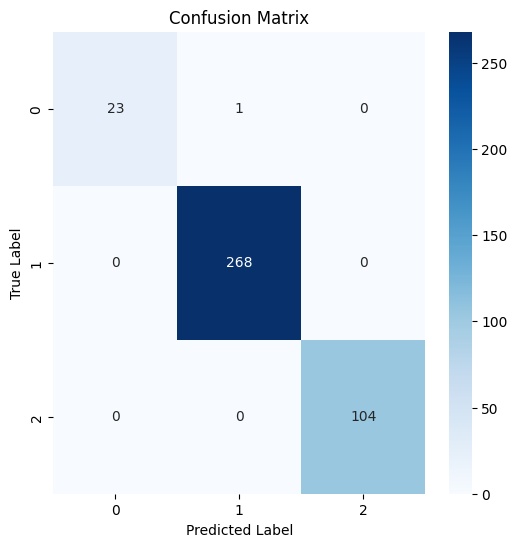

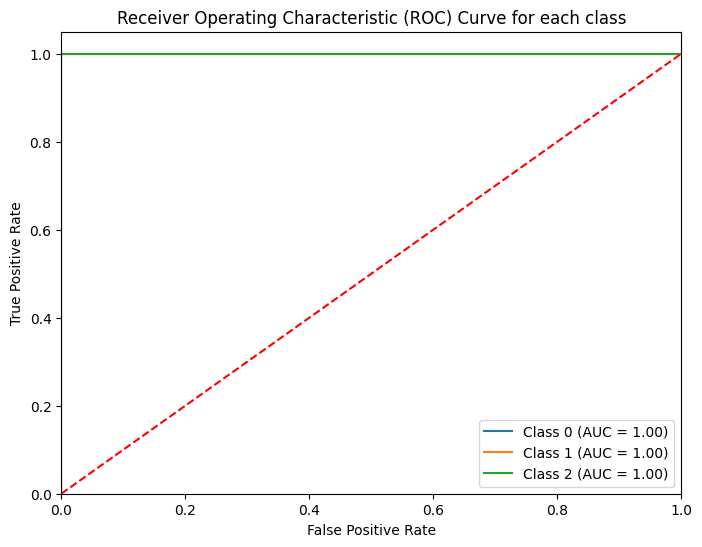

In [16]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from deap import base, creator, tools, algorithms

# Define the ranges for hyperparameters
C_range = np.linspace(0.1, 10.0, 100)  # Increased range and resolution
solvers = ['liblinear', 'lbfgs', 'sag', 'saga', 'newton-cg']

# Split the data into training and test sets
# Assuming X and y are your features and target variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define evaluation function
def evaluate_individual(individual):
    C = individual[0]
    solver = individual[1]

    try:
        # Define the model with the given hyperparameters
        model = LogisticRegression(C=C, solver=solver, max_iter=1000)

        # Fit the model and evaluate on the validation set
        model.fit(X_train, y_train)
        y_val_pred = model.predict(X_val)

        # Calculate accuracy
        accuracy = accuracy_score(y_val, y_val_pred)
        return accuracy,
    except Exception as e:
        print(f"Error with individual {individual}: {e}")
        return 0.0,

# Create individual and population classes
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

# Register genetic algorithm components
toolbox = base.Toolbox()
toolbox.register("attr_C", np.random.choice, C_range)
toolbox.register("attr_solver", np.random.choice, solvers)
toolbox.register("individual", tools.initCycle, creator.Individual,
                 (toolbox.attr_C, toolbox.attr_solver), n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", evaluate_individual)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.5)
toolbox.register("select", tools.selTournament, tournsize=3)

# Create the population
population = toolbox.population(n=100)  # Increased population size

# Apply the genetic algorithm
NGEN = 20  # Increased generations
CXPB = 0.7  # Increased crossover probability
MUTPB = 0.3  # Increased mutation probability

for gen in range(NGEN):
    offspring = algorithms.varAnd(population, toolbox, CXPB, MUTPB)
    fits = map(toolbox.evaluate, offspring)

    for fit, ind in zip(fits, offspring):
        ind.fitness.values = fit

    population = toolbox.select(offspring, k=len(population))

# Select the best individual
best_individual = tools.selBest(population, k=1)[0]
best_C, best_solver = best_individual

# Train and evaluate the final model
final_model = LogisticRegression(C=best_C, solver=best_solver, max_iter=1000)
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

# Calculate and print evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision_weighted = precision_score(y_test, y_pred, average='weighted')
precision_micro = precision_score(y_test, y_pred, average='micro')
precision_macro = precision_score(y_test, y_pred, average='macro')
precision_per_class = precision_score(y_test, y_pred, average=None)

print("Best C:", best_C)
print("Best Solver:", best_solver)
print("Accuracy:", accuracy)
print("Weighted Precision:", precision_weighted)
print("Micro Precision:", precision_micro)
print("Macro Precision:", precision_macro)
print("Precision per class:", precision_per_class)

class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Plot Confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve and AUC for each class
y_pred_probs = final_model.predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
classes = np.unique(y_test)

for class_label in classes:
    y_true_binary = (y_test == class_label).astype(int)
    y_score = y_pred_probs[:, class_label]

    fpr[class_label], tpr[class_label], _ = roc_curve(y_true_binary, y_score)
    roc_auc[class_label] = auc(fpr[class_label], tpr[class_label])

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
for class_label in classes:
    plt.plot(fpr[class_label], tpr[class_label], label=f'Class {class_label} (AUC = %0.2f)' % roc_auc[class_label])

plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for each class')
plt.legend(loc="lower right")
plt.show()
